### Load Important Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading UBER datasets from April to September 

In [16]:
df_apr14=pd.read_csv('uber-raw-data-apr14.csv')
df_may14=pd.read_csv('uber-raw-data-may14.csv')
df_jun14=pd.read_csv('uber-raw-data-jun14.csv')
df_jul14=pd.read_csv('uber-raw-data-jul14.csv')
df_aug14=pd.read_csv('uber-raw-data-aug14.csv')
df_sep14=pd.read_csv('uber-raw-data-sep14.csv')

### Concate the datasets
 > Here we concate UBER picks from **April,2014 to September, 2014** to get a broader understanding.

In [19]:
df = pd.concat([df_apr14, df_may14, df_jun14, df_jul14, df_aug14, df_sep14], ignore_index=True)
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


### Data Understanding and Correction

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


>Observation: Date/Time is not in correct datatype

In [25]:
#Correct Dtype 
df['Date/Time']=pd.to_datetime(df['Date/Time'])

#Extract Day, Month and its name
df['Day'] = df['Date/Time'].dt.day
df['Weekday'] = df['Date/Time'].dt.day_name()
df['Month'] = df['Date/Time'].dt.month
df['Month Name'] = df['Date/Time'].dt.month_name()

#Extracct Hours, Minutes, Seconds
df['Hour'] = df['Date/Time'].dt.hour
df['Minute'] = df['Date/Time'].dt.minute
df['Second'] = df['Date/Time'].dt.second

In [26]:
df.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Month,Month Name,Hour,Minute,Second
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,4,April,0,11,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,4,April,0,17,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,4,April,0,21,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,4,April,0,28,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,4,April,0,33,0


>Observation: Datatype is corrected and extracted the necessary information.

In [28]:
df.describe()

,Date/Time,Lat,Lon,Day,Month,Hour,Minute,Second
count,4534327,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06,4534327.0
mean,2014-07-11 18:50:50.578151424,4.073926e+01,-7.397302e+01,1.594337e+01,6.828703e+00,1.421831e+01,2.940071e+01,0.0
min,2014-04-01 00:00:00,3.965690e+01,-7.492900e+01,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,2014-05-28 15:18:00,4.072110e+01,-7.399650e+01,9.000000e+00,5.000000e+00,1.000000e+01,1.400000e+01,0.0
50%,2014-07-17 14:45:00,4.074220e+01,-7.398340e+01,1.600000e+01,7.000000e+00,1.500000e+01,2.900000e+01,0.0
75%,2014-08-27 21:55:00,4.076100e+01,-7.396530e+01,2.300000e+01,8.000000e+00,1.900000e+01,4.400000e+01,0.0
max,2014-09-30 22:59:00,4.211660e+01,-7.206660e+01,3.100000e+01,9.000000e+00,2.300000e+01,5.900000e+01,0.0
std,NaN,3.994991e-02,5.726670e-02,8.744902e+00,1.703810e+00,5.958759e+00,1.732238e+01,0.0


### Data Exploration and Vizualization

#### 1. Trips per hours

In [31]:
trip_per_hours= df.groupby('Hour')['Hour'].count()
trip_per_hours.head()

Hour
0    103836
1     67227
2     45865
3     48287
4     55230
Name: Hour, dtype: int64

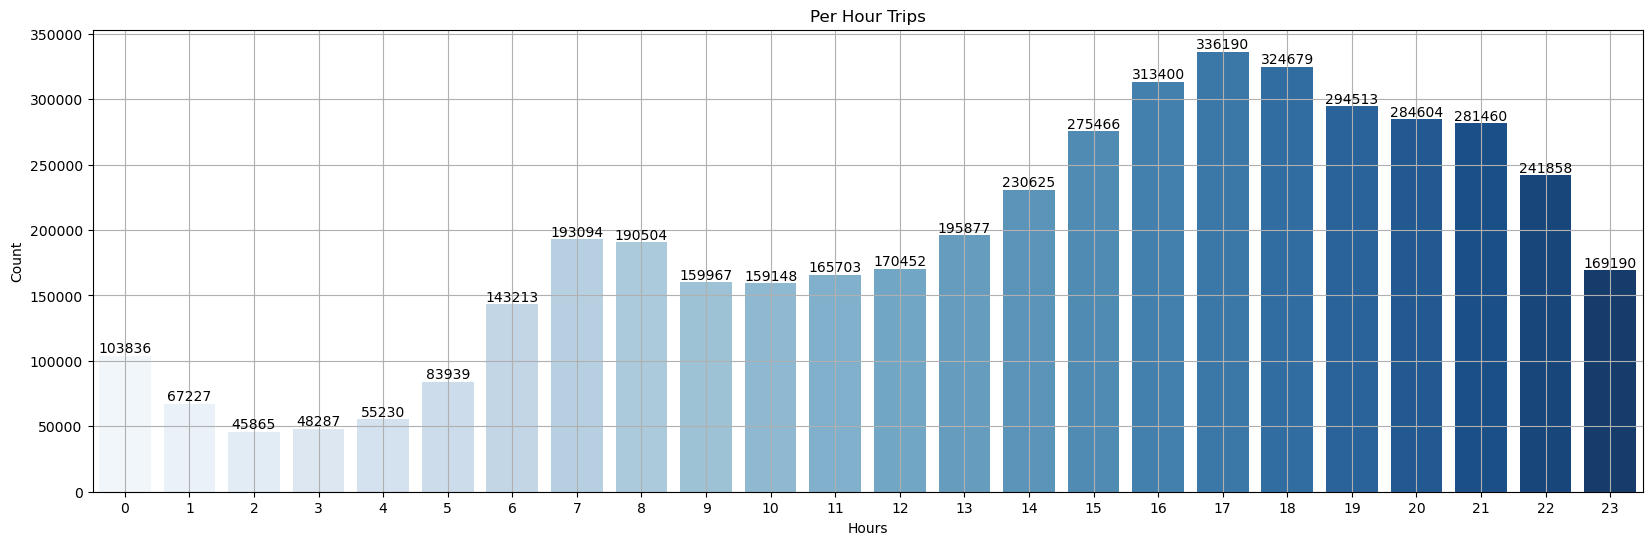

In [32]:
plt.figure(figsize=(20,6))
ax= sns.barplot(data=trip_per_hours, palette='Blues')

# For Values to show:
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Per Hour Trips')
plt.grid(True)
plt.show()

**Observation**:

---
  >1. The number of trips are higher around **16:00 and 18:00, with a spike at 17:00 with 336190 no of trips**.
  >2. It matches the end of a working day in the United States (16:30). So, we can say that the majority of Uber's clients are workers

#### 2. Seasonal Trends

In [37]:
monthly_trip= df.groupby(['Month','Month Name'])['Month'].count()
df_monthly_trip = pd.DataFrame({'Monthly Trip': monthly_trip.values},index=monthly_trip.index)
df_monthly_trip

,,Monthly Trip
Month,Month Name,
4,April,564516
5,May,652435
6,June,663844
7,July,796121
8,August,829275
9,September,1028136


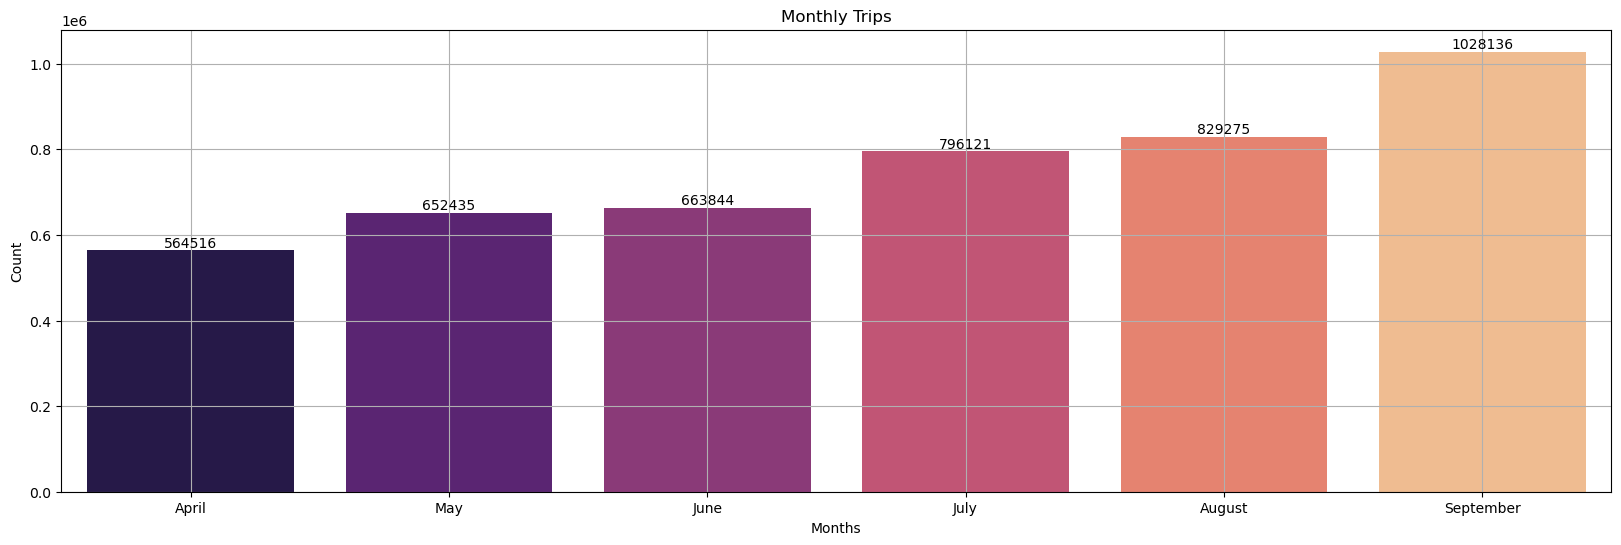

In [38]:
plt.figure(figsize=(20,6))
ax= sns.barplot(data=df_monthly_trip,x='Month Name', y='Monthly Trip',  palette='magma')

# For Values to show:
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Monthly Trips')
plt.grid(True)
plt.show()

**Seasonal Trend Insight**:

---
> From **April to September**, there is a gradual increase in Uber trip volume. This seasonal rise is due to:
 >>1. Warmer weather, encouraging more travel and social activity.
 >>2. Tourism peaks during late spring and summer.
 >>3. Outdoor events and festivals increasing city rides.

In [42]:
percentage_increase= df.groupby(['Month Name'])['Month'].count()
df_monthly_trip_increment = pd.DataFrame({'Monthly Trip': percentage_increase.values},index=percentage_increase.index)

april_trip= df_monthly_trip_increment.loc['April','Monthly Trip']
aug_trip= df_monthly_trip_increment.loc['August','Monthly Trip']
sept_trip= df_monthly_trip_increment.loc['September','Monthly Trip']

In [43]:
#From April to September 
ratio_sept_april= ((sept_trip-april_trip)/april_trip)*100
print(f'From April to September the UBER pick increase with {ratio_sept_april: .2f}% .')

#From August to September 
ratio_sept_aug= ((sept_trip-aug_trip)/aug_trip)*100
print(f'From August to September the UBER pick increase with {ratio_sept_aug: .2f}% .')

From April to September the UBER pick increase with  82.13% .
From August to September the UBER pick increase with  23.98% .


**Observation**:

---
  >1. So, we can see from April to September there is gradual increase in **UBER** picks i.e **~82%**
  >2. Not to mention from August to September the **UBER** picks increase with  **~24%**

#### 3. Weekly Trends

In [49]:
weekly_trip= df.groupby(['Weekday'])['Day'].count()
df_weekly_trip_analysis = pd.DataFrame({'Weekly Trip': weekly_trip.values},index=weekly_trip.index)
df_weekly_trip_analysis

,Weekly Trip
Weekday,
Friday,741139
Monday,541472
Saturday,646114
Sunday,490180
Thursday,755145
Tuesday,663789
Wednesday,696488


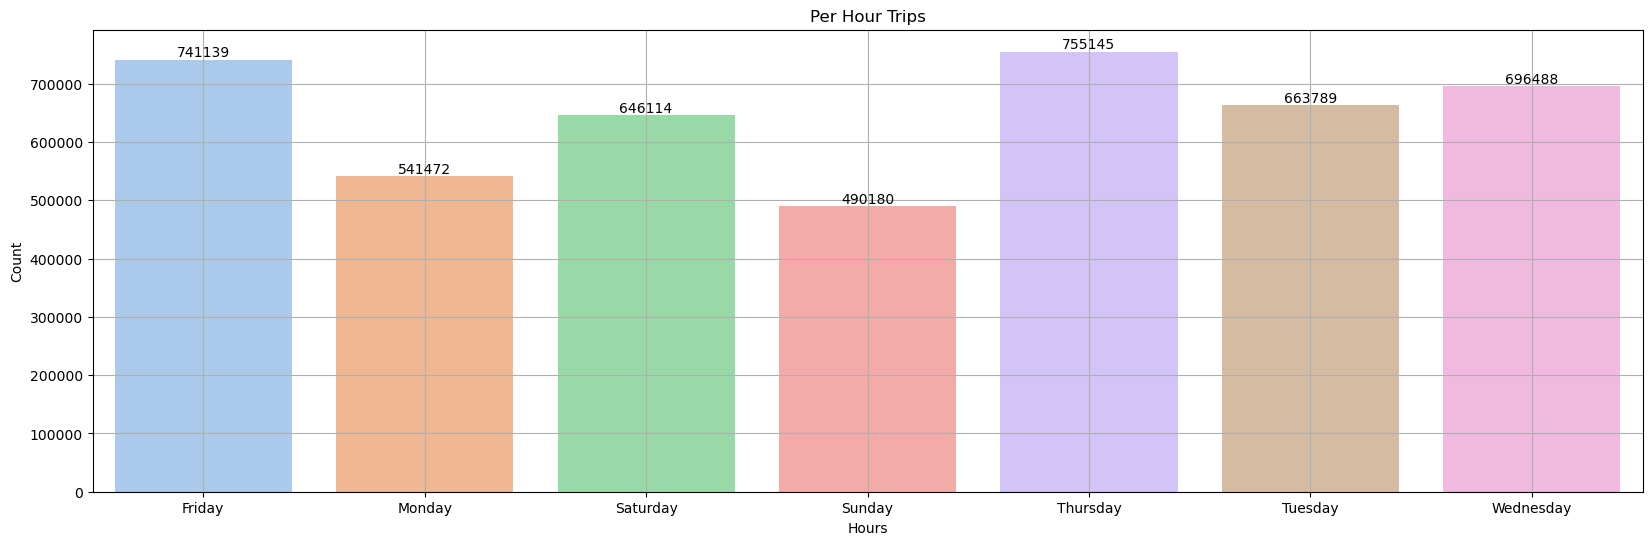

In [52]:
plt.figure(figsize=(20,6))
ax= sns.barplot(data=df_weekly_trip_analysis,x='Weekday', y='Weekly Trip',  palette='pastel')

# For Values to show:
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Per Hour Trips')
plt.grid(True)
plt.show()

####  4. Difference in Trip Volume: Weekdays vs Weekends

In [57]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

# Calculate total trips for weekdays and weekends
weekday_trips = df_weekly_trip_analysis.loc[weekdays, 'Weekly Trip'].sum()
weekend_trips = df_weekly_trip_analysis.loc[weekends, 'Weekly Trip'].sum()

In [59]:
trip_by_day= pd.DataFrame({'Category': ['Weekdays', 'Weekends'], 'Total Trips':[weekday_trips,weekend_trips]})
trip_by_day

,Category,Total Trips
0,Weekdays,3398033
1,Weekends,1136294


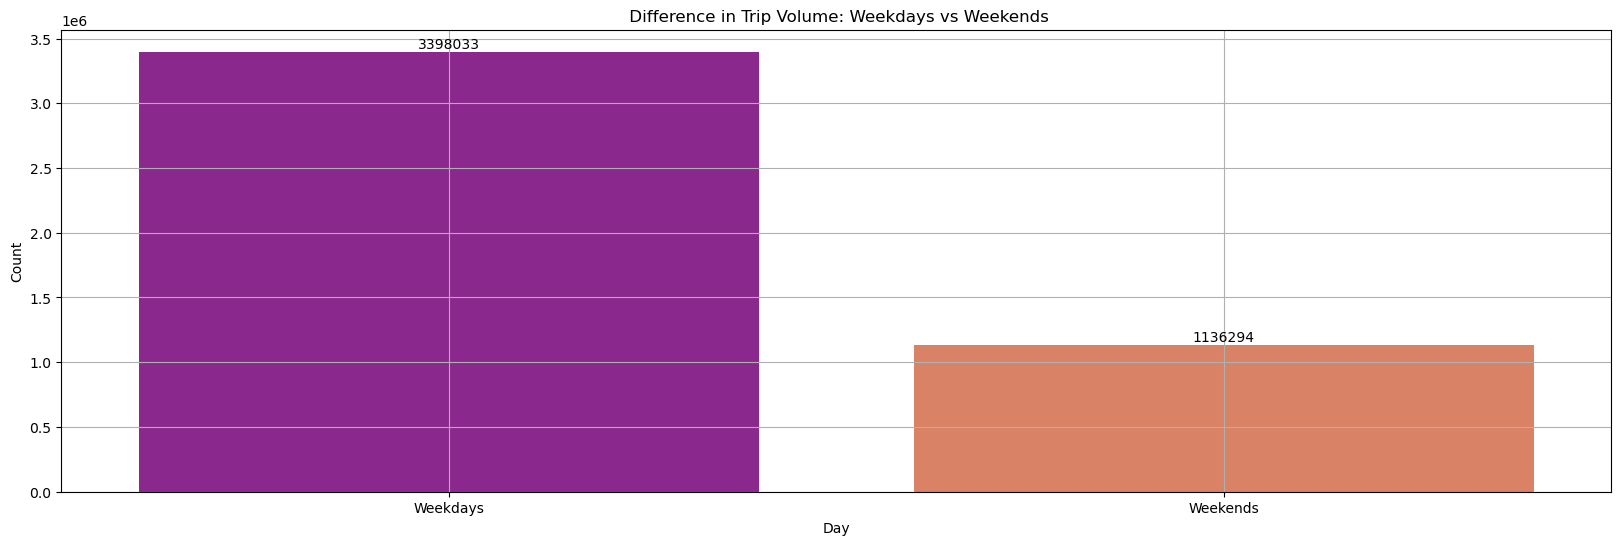

In [61]:
plt.figure(figsize=(20,6))
ax= sns.barplot(data=trip_by_day,x='Category', y='Total Trips',  palette='plasma')

# For Values to show:
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
plt.xlabel('Day')
plt.ylabel('Count')
plt.title(' Difference in Trip Volume: Weekdays vs Weekends')
plt.grid(True)
plt.show()

In [64]:
total_trips = weekday_trips + weekend_trips

x = (weekday_trips / total_trips) * 100
print(f'Weekday trips ~{x: .2f}%')
y = (weekend_trips / total_trips) * 100
print(f'Weekend trips ~{y: .2f}%')

Weekday trips ~ 74.94%
Weekend trips ~ 25.06%


In [66]:
percent_difference = ((weekday_trips - weekend_trips) / weekend_trips) * 100
print(f"Weekday trips are {percent_difference:.2f}% higher than weekend trips.")

Weekday trips are 199.05% higher than weekend trips.


In [68]:
ratio= weekday_trips/weekend_trips
print(f"Weekday trips are {ratio:.2f} times higher than weekend trips.")

Weekday trips are 2.99 times higher than weekend trips.


**Observation**: 

---
  >The analysis reveals a significant difference in Uber trip volumes between weekdays and weekends in NYC. **Weekday trips are ~75%** of all Uber rides in NYC, making them **approximately 3 times more frequent**  than weekend trips (~199% higher).

This highlights strong demands on Weekdays due to **Business Travels, Commuting and Daily activities**. It Suggests more opportunity for:
  >1. **Increasing driver availability**
  >2. **Offering weekday-specific promotions or discounts to meet the high demand**.

#### 5. Average Daily Uber Trips: Weekdays vs Weekends

In [72]:
weekday_avg_trips = df_weekly_trip_analysis.loc[weekdays, 'Weekly Trip'].mean()
weekend_avg_trips = df_weekly_trip_analysis.loc[weekends, 'Weekly Trip'].mean()
avg_trip= pd.DataFrame({'Category': ['Weekdays', 'Weekends'], 'Average Trips':[weekday_avg_trips,weekend_avg_trips]})
avg_trip

,Category,Average Trips
0,Weekdays,679606.6
1,Weekends,568147.0


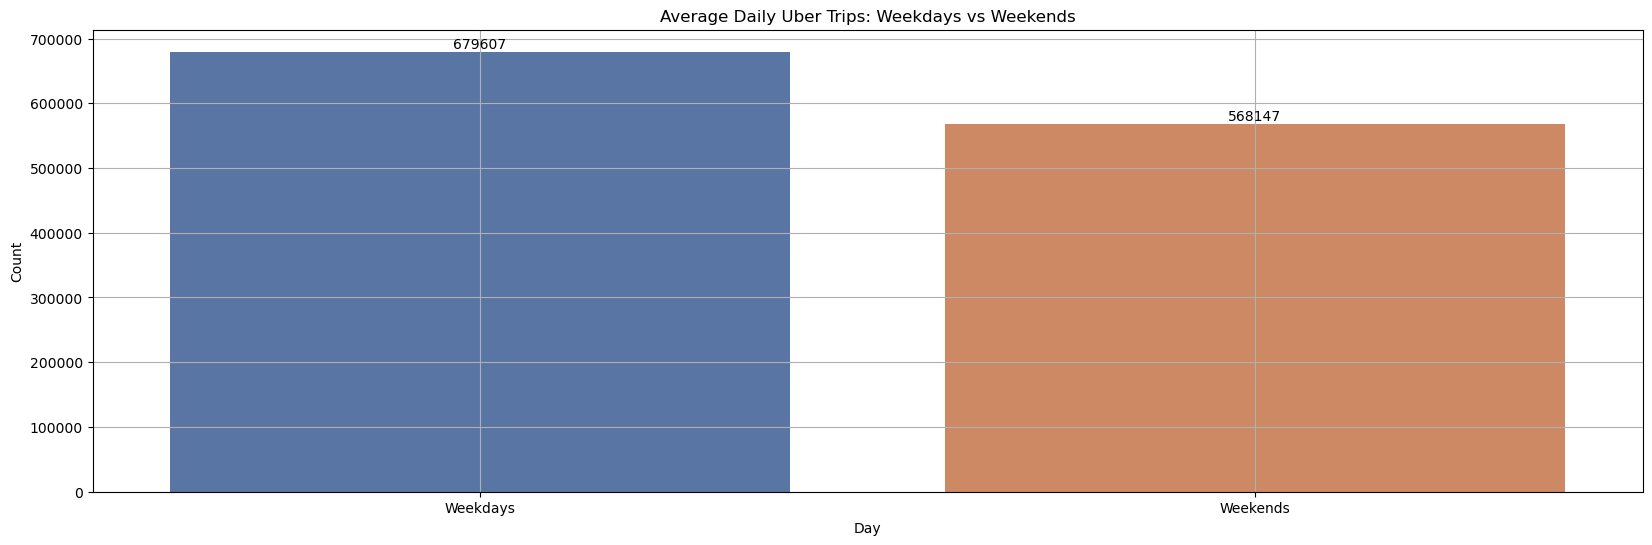

In [74]:
plt.figure(figsize=(20,6))
ax= sns.barplot(data=avg_trip,x='Category', y='Average Trips',  palette='deep')

# For Values to show:
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Average Daily Uber Trips: Weekdays vs Weekends')
plt.grid(True)
plt.show()

In [76]:
percent_diff = ((weekday_avg_trips - weekend_avg_trips) / weekend_avg_trips) * 100
print(f"Weekday trips are {percent_diff:.2f}% higher than weekend trips.")

Weekday trips are 19.62% higher than weekend trips.


**Observation**: 

---
  >The average number of Uber trips on weekdays are  **~20%** higher than weekend trips, means that most Uber activity in NYC is driven by weekdays. 

#### 6. Trips per day

In [80]:
daily_trips= df.groupby(['Day'])['Day'].count()
df_daily_trips= pd.DataFrame({'Days':daily_trips.index, 'No of Days': daily_trips.values})

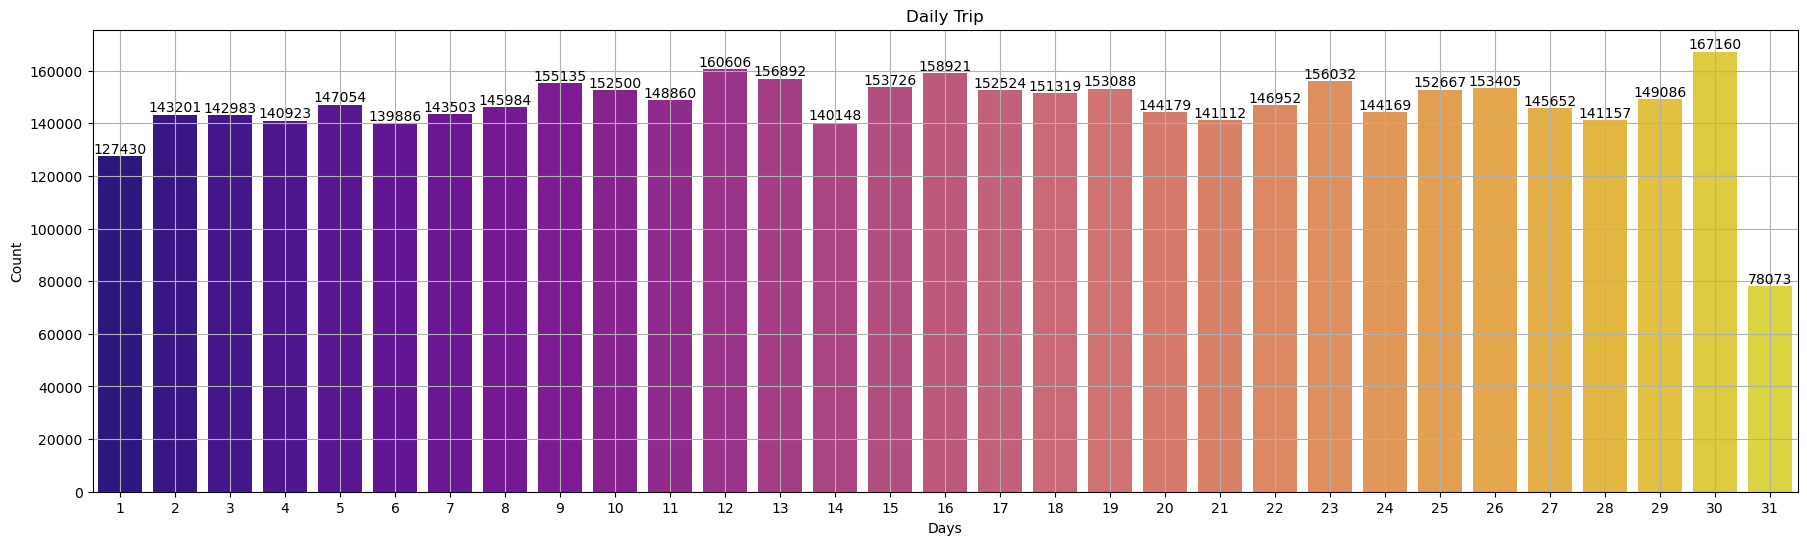

In [82]:
plt.figure(figsize=(22,6))
ax= sns.barplot(data=df_daily_trips,x='Days', y='No of Days',  palette='plasma')

# For Values to show:
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Daily Trip')
plt.grid(True)
plt.show()

**Observation**: 

---
  >There is not much difference in variation on daily basis trip. The 31st value is low due to less data for 31 days as there are only 3 months have 31 days from April-September. 

### Heatmap Plots for better understanding:

#### 1. Hour vs Day: Hourly distribution of Uber trips across weekdays from April to September.

In [87]:
hour_by_day= df.groupby(['Hour','Weekday'])['Weekday'].count()
hour_by_day

Hour  Weekday  
0     Friday       13716
      Monday        6436
      Saturday     27633
      Sunday       32877
      Thursday      9293
                   ...  
23    Saturday     43174
      Sunday       12166
      Thursday     27764
      Tuesday      14869
      Wednesday    18146
Name: Weekday, Length: 168, dtype: int64

In [88]:
heatmap_pivot= df.pivot_table(columns= 'Weekday', index= 'Hour', values='Day', aggfunc='count')
heatmap_pivot.head(2)

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,13716,6436,27633,32877,9293,6237,7644
1,8163,3737,19189,23015,5290,3509,4324


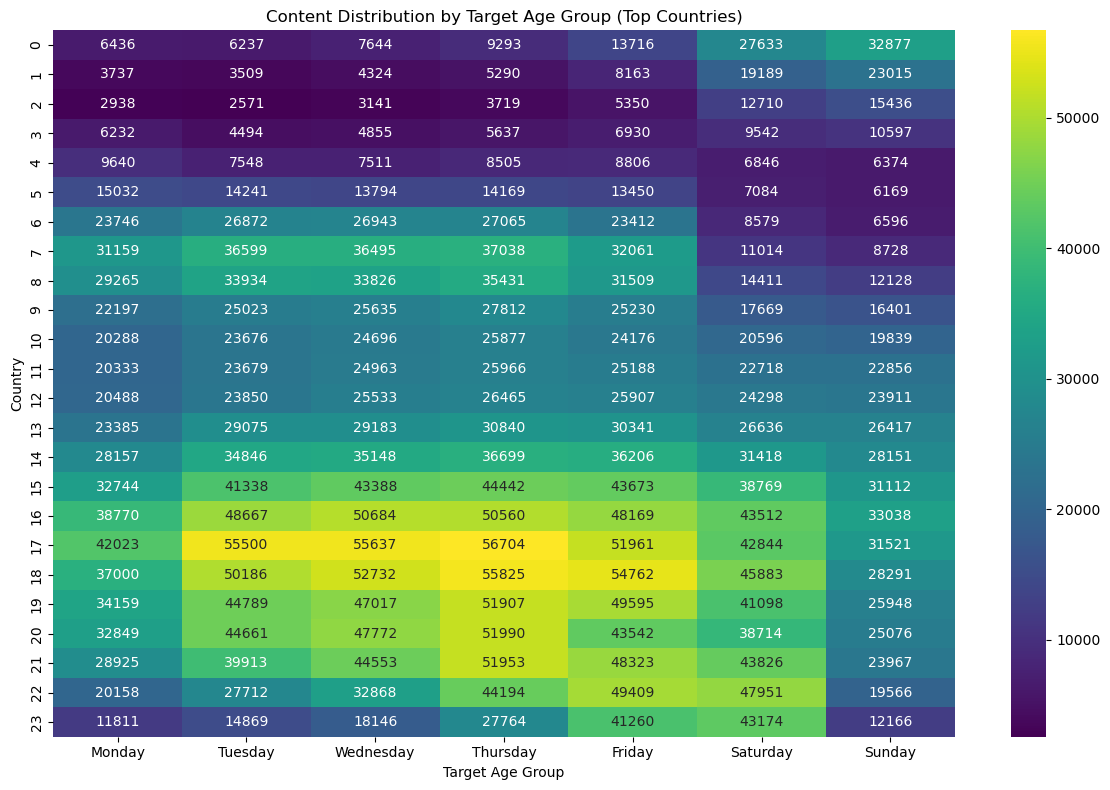

In [90]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_pivot = heatmap_pivot[weekday_order]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt='d', cmap='viridis')
plt.title('Content Distribution by Target Age Group (Top Countries)')
plt.xlabel('Target Age Group')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**Observation**: 

---
  >1. We can see that from the heatmap that, Monday to Friday the no of trips usually higher from **16:00** to till **22:00** and **peak time is around 17:00**.
  >2. **On Friday the number of trips remains high until 23:00 and continues on early Saturday**. It corresponds to the time where people come out from work, then go out for dinner or drink before the weekend.
  >3. It is noticable that the same pattern on Saturday, people tend to go out at night, the number of trips remains on high until early Sunday.

#### 2. Month vs Weekday Heatmap: Monthly variation in Uber trip volume across different weekdays

In [95]:
month_by_day= df.groupby(['Month Name','Weekday'])['Weekday'].count()
month_by_day.head()

Month Name  Weekday 
April       Friday      90303
            Monday      60861
            Saturday    77218
            Sunday      51251
            Thursday    85067
Name: Weekday, dtype: int64

In [96]:
heatmap_pivot_month= df.pivot_table(columns= 'Weekday', index= 'Month Name', values='Day', aggfunc='count')
heatmap_pivot_month.head(2)

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month Name,,,,,,,
April,90303,60861,77218,51251,85067,91185,108631
August,148674,91633,132225,110246,124117,107124,115256


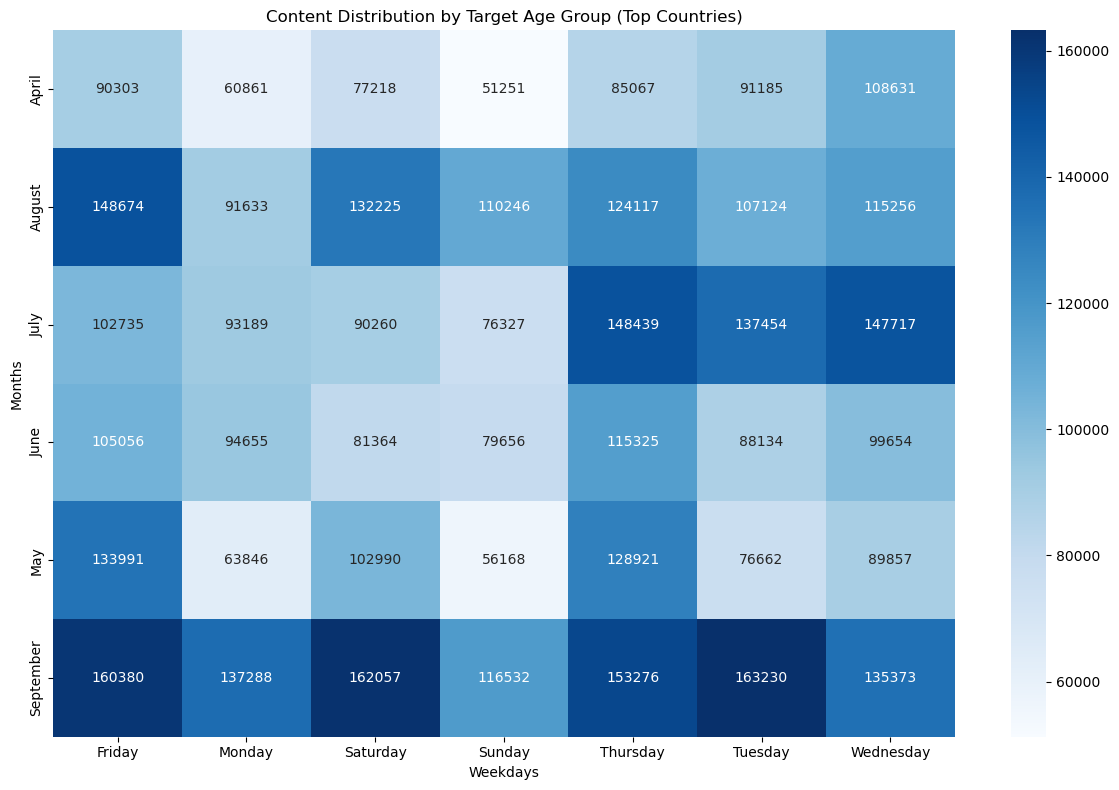

In [98]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_pivot = heatmap_pivot[weekday_order]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot_month, annot=True, fmt='d', cmap='Blues')
plt.title('Content Distribution by Target Age Group (Top Countries)')
plt.xlabel('Weekdays')
plt.ylabel('Months')
plt.tight_layout()
plt.show()

**Observation**: 

---
  > Trip volume increases from April to September, indicating seasonal growth in Uber demand, particularly during summer months.

#### Scatter plot for location understanding- latitude - longitude 

Text(0.5, 1.0, 'Latitude - Longitude Scatter Plot')

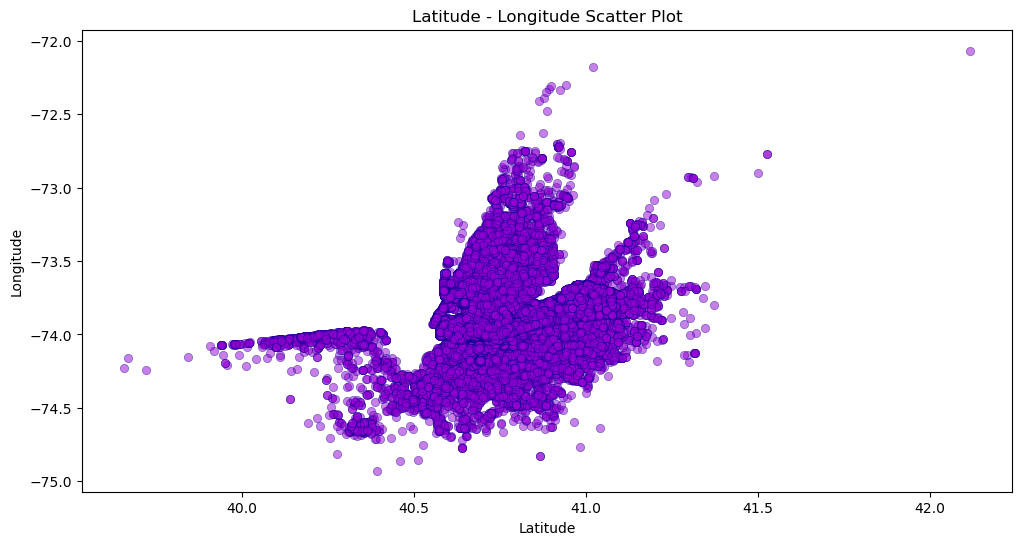

In [103]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Lat',y='Lon',data=df,edgecolor='darkblue',alpha=0.5,color='darkviolet')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Latitude - Longitude Scatter Plot')

**Observation**: 
    
---
 > The darkviolet area in the center shows the regions in New York City that had most number of uber rides from April- September, 2014. The plot is better understood when a geographical map is placed underneath.

In [105]:
df.to_csv('Uber_apr_sept.csv', index=False)

### **Conclusion**: 
    Through the analysis of the Uber Pickups in New York City data set in 2014, we managed to get the following informations:

---
 > 1. **Peak demand at 17:00 hours**.
 > 2. From April to September, there is a **seasonal rise in Uber trip volume**.
 > 3. From April to September, **Weekdays have 3 times more UBER picks than weekends**.
 > 4. Also on average, **Weekdays have ~20% more**  picks than Weekends. This highlights stronger weekday demand during warmer months.
 > 5. We can see that from the heatmap that, Monday to Friday the number of trips usually higher from **16:00** to till **22:00**. On Friday the number of trips remains high until late night **23:00** and continues on early Saturday. Same pattern observed on Saturday also.

---

**Suggestions**:
